In [21]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/Liz283/DataMining/main/Mathdataset_1662109.csv')
data.head()

,survey_id,gender,study_domain,study_year,avg_grade,housing,budget,relationship,social_events,drinks
0,25c9591e-517b-4d38-a4b8-4e0d9f4bad51,male,natural sciences,third,7.54,parents,high,yes,average,2
1,4a65291c-3bfc-4615-9194-af50f1c0662d,female,natural sciences,fourth,7.25,student housing,low,no,low,4
2,27115969-d3c3-4c48-80ff-40912fb9d4a4,male,computer sciences,second,7.55,student housing,low,no,average,9
3,23d569d4-8327-4cd4-8ff6-98750d9bc761,female,business,fourth,7.00,parents,average,yes,average,8
4,800c4ee2-c3a7-42cc-9a47-902b32d4038d,female,computer sciences,third,8.21,parents,high,yes,low,1


In [22]:
missing_values = data.isnull().sum()
missing_values, len(data)

(survey_id        11
 gender            4
 study_domain      0
 study_year        0
 avg_grade         0
 housing           0
 budget            0
 relationship      0
 social_events     0
 drinks            0
 dtype: int64,
 350)

In [25]:
data = data.dropna()
missing_values = data.isnull().sum()
missing_values, len(data)

(survey_id        0
 gender           0
 study_domain     0
 study_year       0
 avg_grade        0
 housing          0
 budget           0
 relationship     0
 social_events    0
 drinks           0
 dtype: int64,
 335)

# **Question 1**

In [24]:
import numpy as np

# Calculate descriptive statistics for the 'drinks' column
descriptive_stats = data['drinks'].describe()

# Calculate skewness
skewness = data['drinks'].skew()

# Adding skewness to descriptive stats for a complete summary
descriptive_stats['skewness'] = skewness

descriptive_stats


count       335.000000
mean          6.773134
std           4.759094
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          20.000000
skewness      0.736716
Name: drinks, dtype: float64

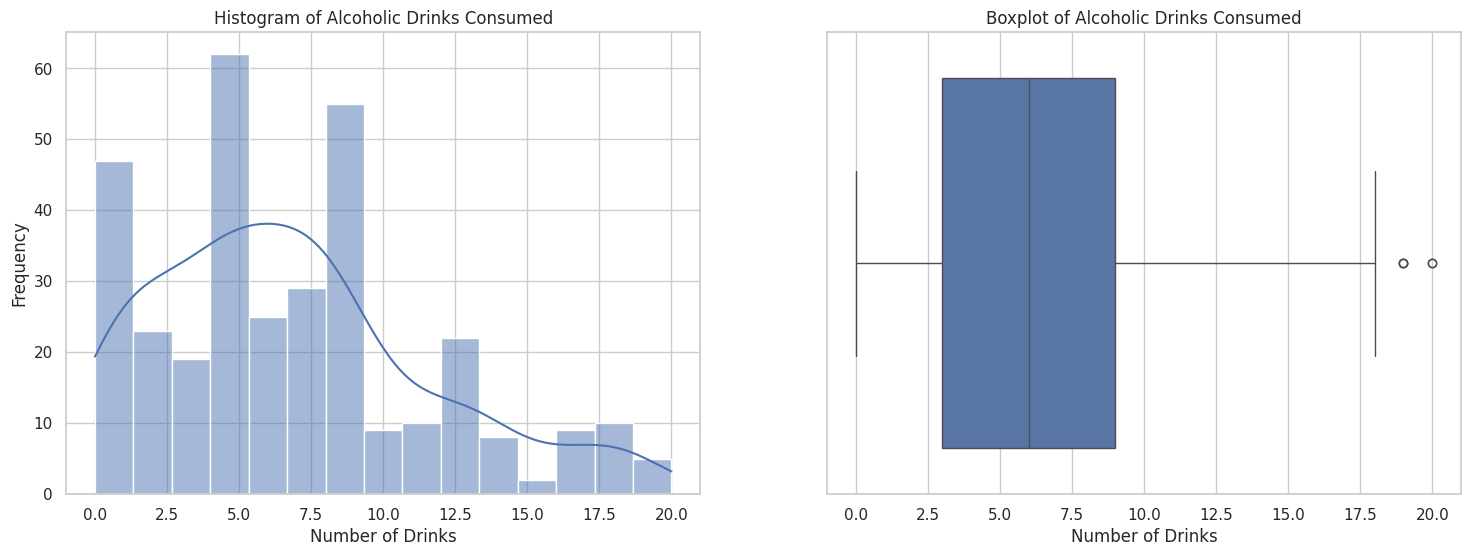

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
sns.histplot(data['drinks'], bins=15, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Alcoholic Drinks Consumed')
ax[0].set_xlabel('Number of Drinks')
ax[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=data['drinks'], ax=ax[1])
ax[1].set_title('Boxplot of Alcoholic Drinks Consumed')
ax[1].set_xlabel('Number of Drinks')
plt.show()


# **Question 2**

In [29]:
# Filter the data into male and female groups
male_drinks = data[data['gender'] == 'male']['drinks']
female_drinks = data[data['gender'] == 'female']['drinks']

# Calculate the number of males and females consuming more than 4 drinks
male_above_4 = (male_drinks > 4).sum()
female_above_4 = (female_drinks > 4).sum()

# Calculate the total number of males and females
total_males = male_drinks.count()
total_females = female_drinks.count()

# Calculate the probability of consuming more than 4 drinks
probability_male = male_above_4 / total_males
probability_female = female_above_4 / total_females

probability_male, probability_female, total_males, total_females


(0.6419753086419753, 0.6589595375722543, 162, 173)

# **Question 3**

In [30]:
from scipy import stats

# Assuming 'avg_grade' column holds the grade information
grades = data['avg_grade']

# Perform one-sample t-test against the benchmark grade of 6.5
t_test_result = stats.ttest_1samp(grades, 6.5)

# Calculate the mean grade and the standard deviation for the confidence interval calculation
mean_grade = grades.mean()
std_dev_grade = grades.std()
n = len(grades)
confidence_level = 0.95
degrees_freedom = n - 1

# Calculate the 95% confidence interval for the mean grade
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_grade, std_dev_grade / np.sqrt(n))

t_test_result, mean_grade, confidence_interval


(TtestResult(statistic=10.38436833186984, pvalue=4.459430662232854e-22, df=334),
 6.997313432835821,
 (6.903108255831396, 7.091518609840246))

# **Question 4A**

                mean       std      skew
drinks_cat                              
a lot       6.633899  0.783590 -0.635171
little      7.782800  0.607225 -0.107596
none        7.701000  0.477514  1.068453
tolerable   7.547872  0.611292 -0.032093
ANOVA Results: F-statistic = 53.491295555000114 P-value = 3.2408773899946895e-28


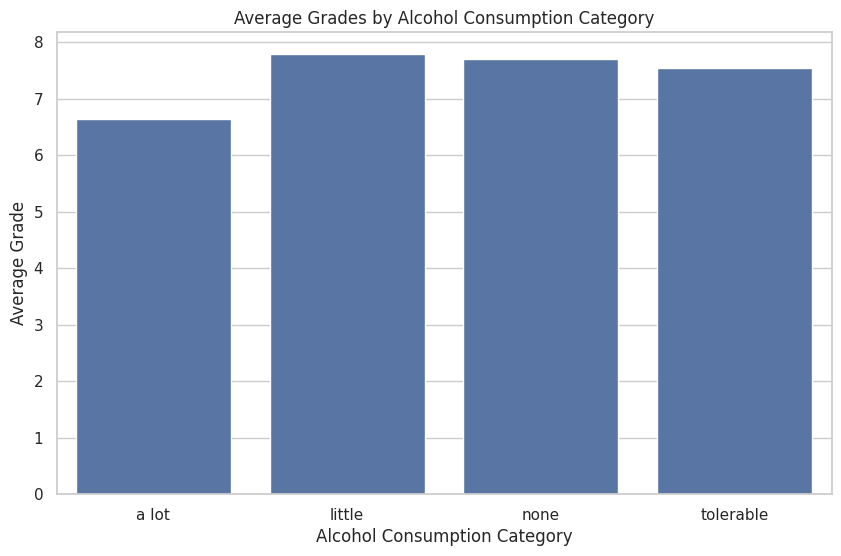

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming the dataframe 'data' is already loaded with the relevant columns

# Create the drinks category based on specified ranges
conditions = [
    (data['drinks'] == 0),
    (data['drinks'].between(1, 2)),
    (data['drinks'].between(3, 4)),
    (data['drinks'] > 4)
]
choices = ['none', 'little', 'tolerable', 'a lot']
data['drinks_cat'] = np.select(conditions, choices)

# Descriptive statistics: Calculate mean and standard deviation of grades for each category
average_grade_by_drinks_cat = data.groupby('drinks_cat')['avg_grade'].agg(['mean', 'std', 'skew'])

# Inferential analysis: ANOVA to test if there are significant differences in grades among categories
anova_results = stats.f_oneway(
    data[data['drinks_cat'] == 'none']['avg_grade'],
    data[data['drinks_cat'] == 'little']['avg_grade'],
    data[data['drinks_cat'] == 'tolerable']['avg_grade'],
    data[data['drinks_cat'] == 'a lot']['avg_grade']
)

print(average_grade_by_drinks_cat)
print("ANOVA Results: F-statistic =", anova_results.statistic, "P-value =", anova_results.pvalue)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=average_grade_by_drinks_cat.index, y='mean', data=average_grade_by_drinks_cat.reset_index())
plt.title('Average Grades by Alcohol Consumption Category')
plt.xlabel('Alcohol Consumption Category')
plt.ylabel('Average Grade')
plt.show()



# **Question 4 B2**

Descriptive Statistics for Average Number of Drinks by Study Year:
                mean       std      skew
study_year                              
first       6.493671  4.741723  0.802464
fourth      6.851485  4.794551  0.668825
second      6.658228  4.632345  0.826536
third       7.078947  4.930891  0.710689


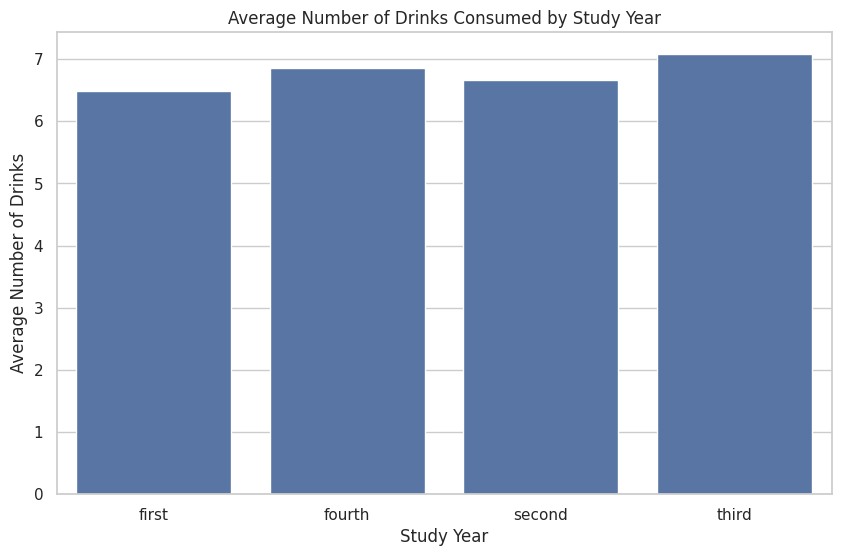

ANOVA test results: F_onewayResult(statistic=0.21834293843186958, pvalue=0.8836480139404094)


In [63]:

drinks_stats = data.groupby('study_year')['drinks'].agg(['mean', 'std', 'skew']).sort_index()

print("Descriptive Statistics for Average Number of Drinks by Study Year:")
print(drinks_stats)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=average_drinks_by_year.index, y=average_drinks_by_year.values)
plt.title('Average Number of Drinks Consumed by Study Year')
plt.xlabel('Study Year')
plt.ylabel('Average Number of Drinks')
plt.show()

# ANOVA test to check for significant differences between study years
anova_results = stats.f_oneway(
    *[data[data['study_year'] == year]['drinks'] for year in data['study_year'].unique()]
)


print("ANOVA test results:", anova_results)


# **Question 4 C1**

Descriptive Statistics for Average Number of Drinks by Housing Situation:
                     mean       std      skew
housing                                      
other            8.447368  5.279729  0.271640
parents          5.071895  3.953853  0.975417
student housing  8.138889  4.832308  0.590262


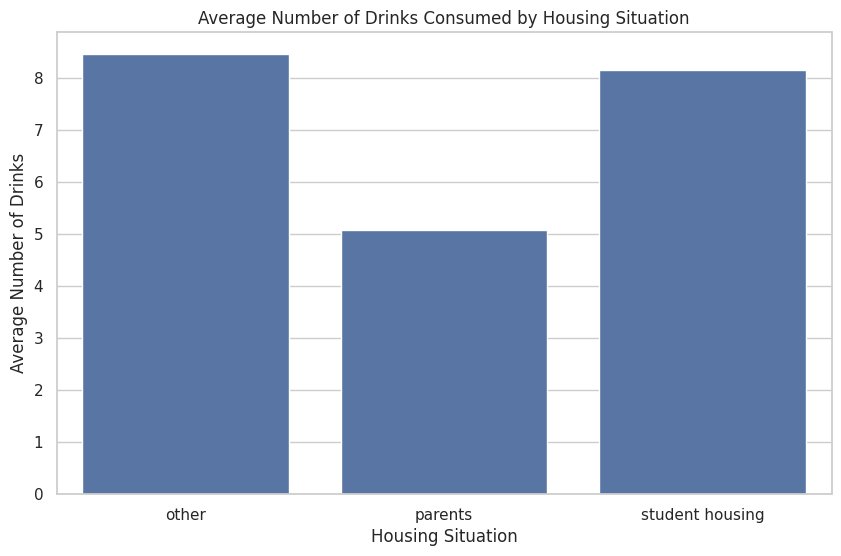

t-test results: t-statistic = -5.96531815507842 P-value = 7.442321734280825e-09


In [69]:
# Calculate the average number of drinks per housing situation
average_drinks_by_housing = data.groupby('housing')['drinks'].agg(['mean', 'std', 'skew'])

print("Descriptive Statistics for Average Number of Drinks by Housing Situation:")
print(average_drinks_by_housing)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=average_drinks_by_housing.index, y=average_drinks_by_housing['mean'])
plt.title('Average Number of Drinks Consumed by Housing Situation')
plt.xlabel('Housing Situation')
plt.ylabel('Average Number of Drinks')
plt.show()

# t-test between students living at home vs. student housing
t_test_results = stats.ttest_ind(
    data[data['housing'] == 'parents']['drinks'],
    data[data['housing'] == 'student housing']['drinks'],
    equal_var=False  # Assume unequal variance due to different sample sizes
)

print("t-test results: t-statistic =", t_test_results.statistic, "P-value =", t_test_results.pvalue)
